In [11]:
import os
import time
import random

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [12]:
random.seed(0)

np.random.seed(0)

In [13]:
data_loc = "./project_processed_data/_tf-idf_v5/"

In [14]:
# Train sets
train_data = np.load('{}x_train_tf-idf_v5.npy'.format(data_loc))
read_train_labels = pd.read_csv('{}y_train_tf-idf_v5.csv'.format(data_loc))
train_labels = read_train_labels['Label'] == 'Anomaly'
train_labels = train_labels.astype(int)

# Test sets
test_data = np.load('{}x_test_tf-idf_v5.npy'.format(data_loc))
read_test_labels = pd.read_csv('{}y_test_tf-idf_v5.csv'.format(data_loc))
test_labels = read_test_labels['Label'] == 'Anomaly'
test_labels = test_labels.astype(int)

In [6]:
train_data.shape

(197301, 16, 43)

In [7]:
test_data.shape

(60336, 16, 43)

In [15]:
# Reshape the data to 2D
train_data_reshaped = train_data.reshape(train_data.shape[0], -1)
test_data_reshaped = test_data.reshape(test_data.shape[0], -1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(train_data_reshaped, train_labels)

# Predict on the test set
rf_predictions = rf_clf.predict(test_data_reshaped)
rf_probabilities = rf_clf.predict_proba(test_data_reshaped)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print("Accuracy:", accuracy_score(test_labels, rf_predictions))
print("\nClassification Report:")
print(classification_report(test_labels, rf_predictions))

Accuracy: 0.9985884380800849

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59508
           1       0.99      0.94      0.97       828

    accuracy                           1.00     60336
   macro avg       1.00      0.97      0.98     60336
weighted avg       1.00      1.00      1.00     60336



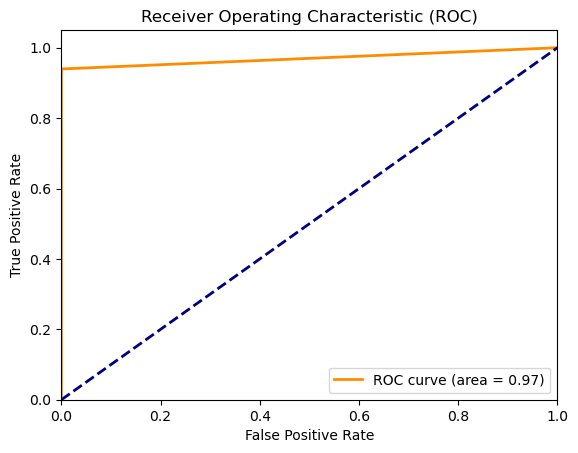

In [16]:
import matplotlib.pyplot as plt
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test_labels, test_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()